  Category  Numeric1  Numeric2
0        A        10       5.5
1        B        15       4.5
2        A         8       6.0
3        B        12       4.0
4        C        20       7.2
5        C        25       6.7
6        A         7       5.8
7        B        11       4.2
8        C        18       7.0
9        A         6       5.0


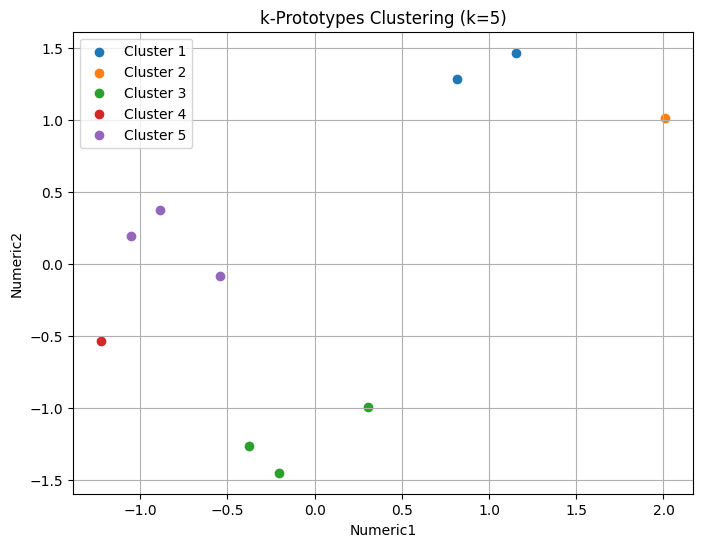

In [1]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a synthetic mixed data dataset
data = {
    'Category': ['A', 'B', 'A', 'B', 'C', 'C', 'A', 'B', 'C', 'A'],
    'Numeric1': [10, 15, 8, 12, 20, 25, 7, 11, 18, 6],
    'Numeric2': [5.5, 4.5, 6.0, 4.0, 7.2, 6.7, 5.8, 4.2, 7.0, 5.0]
}

df = pd.DataFrame(data)

print(df)

# Encode categorical data
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# Scale numerical data
scaler = StandardScaler()
df[['Numeric1', 'Numeric2']] = scaler.fit_transform(df[['Numeric1', 'Numeric2']])

# Define the number of clusters (k)
k = 5

# Initialize and fit k-Prototypes model
kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
clusters = kproto.fit_predict(df.values, categorical=[0])  # Specify that 'Category_encoded' is categorical

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Numeric1'],
        cluster_data['Numeric2'],
        label=f'Cluster {cluster + 1}'
    )

plt.title(f'k-Prototypes Clustering (k={k})')
plt.xlabel('Numeric1')
plt.ylabel('Numeric2')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

# Create a synthetic mixed data dataset
data = {
    'Category': ['A', 'B', 'A', 'B', 'C', 'C', 'A', 'B', 'C', 'A'],
    'Numeric1': [10, 15, 8, 12, 20, 25, 7, 11, 18, 6],
    'Numeric2': [5.5, 4.5, 6.0, 4.0, 7.2, 6.7, 5.8, 4.2, 7.0, 5.0]
}

df = pd.DataFrame(data)

# Encode categorical data
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# Scale numerical data
scaler = StandardScaler()
df[['Numeric1', 'Numeric2']] = scaler.fit_transform(df[['Numeric1', 'Numeric2']])

# Define a range of k values to evaluate
k_values = range(2, 6)  # Example range from 2 to 5 clusters

# Initialize a list to store silhouette scores
silhouette_scores = []

# Fit k-Prototypes and calculate silhouette scores for each k
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    clusters = kproto.fit_predict(df.values, categorical=[0])  # Specify that 'Category_encoded' is categorical
    silhouette_avg = silhouette_score(df.values, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


ValueError: could not convert string to float: 'A'

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

# Define a range of k values to evaluate
k_values = range(2, 11)  # Example range from 2 to 10 clusters

# Initialize a list to store silhouette scores
silhouette_scores = []

# Fit k-Prototypes and calculate silhouette scores for each k
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    clusters = kproto.fit_predict(X, categorical=[1, 2, 3])  # Specify which columns are categorical
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)

# Find the k with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

print("Optimal k:", optimal_k)


NameError: name 'X' is not defined